# Notebook for Part 1 - Exploration and Preprocessing

In [11]:
# Import Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import numpy as np

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display


# 1.a) Question: Import the log and give shape

In [13]:

# load the heart-disease-raw dataset and display the first few rows
heart_disease_raw_data = pd.read_csv('../heart_disease_data/heart_disease_raw.csv')
display(heart_disease_raw_data.head())

# display the shape of the dataset (number of rows and columns)
print("The number of rows and columns of the dataset are: ", heart_disease_raw_data.shape)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


The number of rows and columns of the dataset are:  (920, 16)


## 1.b) Question Basic Statistics

In [14]:
# get an overview of the basic statistics of the dataset
display(heart_disease_raw_data.describe())

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## 1.c) Question about the interpretation of mean of num
(no code)

## 1.d) Question: Class imbalance female, male

In [18]:
# find the number of female and male patients in the dataset

print(heart_disease_raw_data['sex'].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64


## 1.e) Question: Distribution target feature

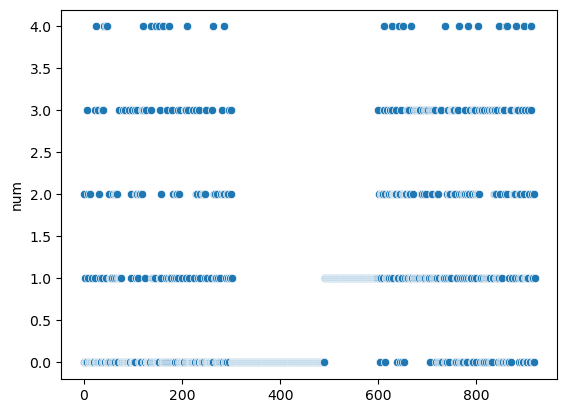

In [52]:
# a visualization of the num feature

plot = sns.scatterplot(heart_disease_raw_data['num'])

In [53]:
# find the mode of the num feature
print(heart_disease_raw_data['num'].mode())

0    0
Name: num, dtype: int64


## 1.f) Question: Binning

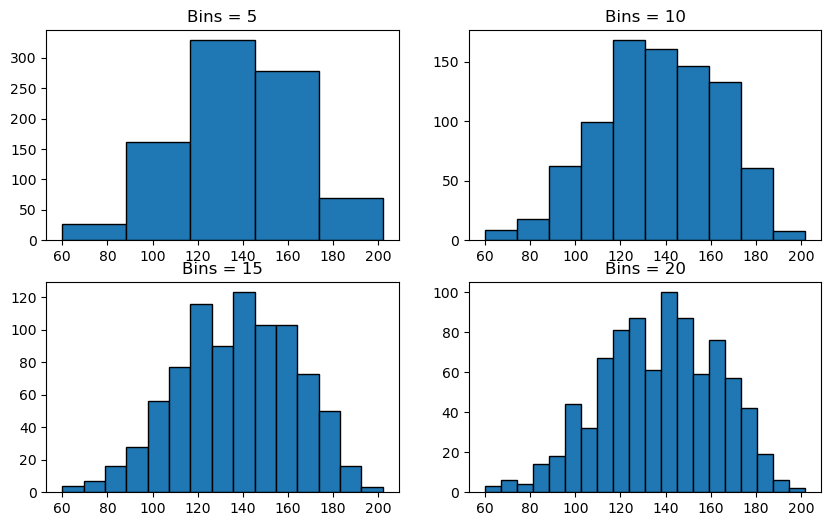

In [44]:
# create a histogram for the 'thalch' feature with an appropriate number of bins
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].hist(heart_disease_raw_data['thalch'], edgecolor='black', bins=5)
axs[0, 0].set_title('Bins = 5')

axs[0, 1].hist(heart_disease_raw_data['thalch'], edgecolor='black', bins=10)
axs[0, 1].set_title('Bins = 10')

axs[1, 0].hist(heart_disease_raw_data['thalch'], edgecolor='black', bins=15)
axs[1, 0].set_title('Bins = 15')

axs[1, 1].hist(heart_disease_raw_data['thalch'],edgecolor='black', bins=20)
axs[1, 1].set_title('Bins = 20')

plt.show()

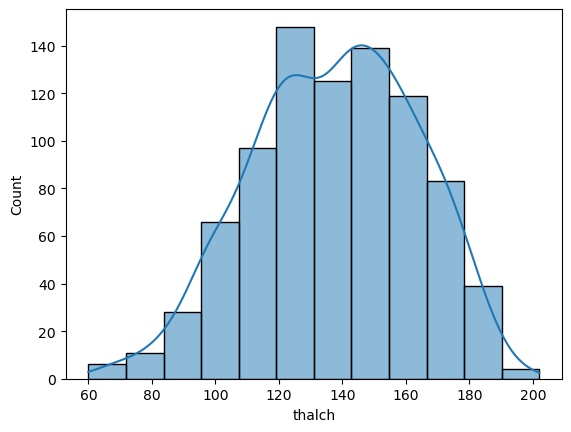

In [48]:
sns.histplot(heart_disease_raw_data['thalch'], kde=True, bins=12, edgecolor='black')
plt.show()

## 1.g) Question: Correlation

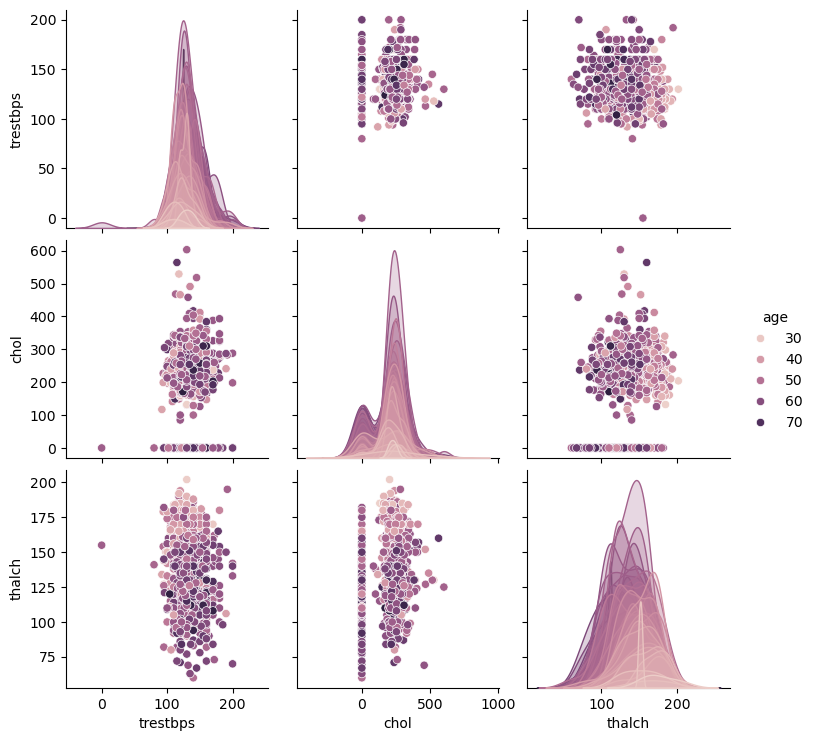

In [59]:
# create a scatterplot matrix for the attributes 'age', 'trestbps', 'chol', and 'thalch'
sns.pairplot(heart_disease_raw_data[['age', 'trestbps', 'chol', 'thalch']], hue='age')

## 1.h) Question: Correlation

               age  trestbps      chol    thalch
age       1.000000  0.244253 -0.086234 -0.365778
trestbps  0.244253  1.000000  0.092853 -0.104899
chol     -0.086234  0.092853  1.000000  0.236121
thalch   -0.365778 -0.104899  0.236121  1.000000


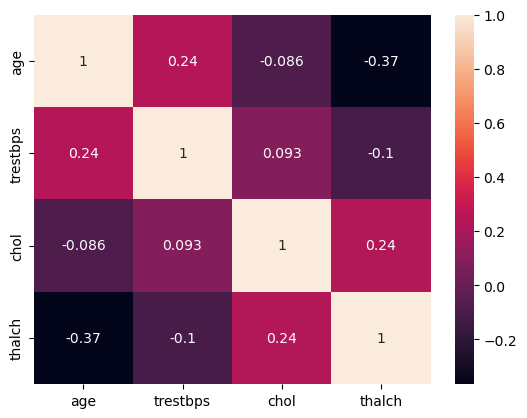

In [62]:
# compute correlations for all the above feature pairs
correlations = heart_disease_raw_data[['age', 'trestbps', 'chol', 'thalch']].corr()
print(correlations)

# visualize the correlation matrix using a heatmap
heatmap = sns.heatmap(correlations, annot=True)
plt.show()

## 1.i) Question Boxplot Interpretation
(no code)

## 1.j) Question: NANs per feature

In [64]:
# find the number of missing values in each column of the dataset
missing_values = heart_disease_raw_data.isnull().sum()
print(missing_values)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


## 1.k) Question: Simple Remove NaNs

In [65]:
# remove all the rows with missing values in the dataset
heart_disease_no_missing_values = heart_disease_raw_data.dropna()

In [67]:
# the shape of the new dataset without missing values is diffent from the original dataset
print(heart_disease_no_missing_values.shape)

(299, 16)
